In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


# Importing libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='w'
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading the dataset

In [3]:
data_ver=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
data_ver.sample(10)                                

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
82,83,320,110,5,5.0,4.5,9.22,1,0.92
340,341,312,107,3,3.0,3.0,8.46,1,0.75
456,457,299,100,2,2.0,2.0,7.88,0,0.51
432,433,324,112,4,4.5,4.0,9.22,1,0.86
35,36,320,110,5,5.0,5.0,9.20,1,0.88
445,446,328,116,5,4.5,5.0,9.08,1,0.91
280,281,311,102,3,4.5,4.0,8.64,1,0.68
251,252,316,99,2,2.5,3.0,9.00,0,0.70
51,52,312,100,2,1.5,3.5,7.90,1,0.56
112,113,301,107,3,3.5,3.5,8.34,1,0.62


# Descriptions of the dataset

In [4]:
print('The dataset contains {} rows and columns'.format(data_ver.shape))

The dataset contains (500, 9) rows and columns


In [5]:
print(data_ver.isna().sum())
print(data_ver.info())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [6]:
#to remove duplicates $ rechecking the size
data_ver.drop_duplicates(inplace=True)
print(data_ver.shape)

(500, 9)


It clearly indicates there's no null values and duplicated values as well!!

In [7]:
#renaming the column names since there's some gap between two features
data_ver.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [8]:
data_ver.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

# Statistical Summary

In [9]:
data_ver.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
#dropping 'Serial No' since there's no use of it
data_ver.drop(columns='Serial No.',axis=1,inplace=True)
data_ver.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Data Visualization

In [11]:
!pip install plotly

In [12]:
import plotly.express as px

In [13]:
px.histogram(data_ver,x="GRE Score")

In [14]:
print(data_ver['GRE Score'].value_counts(ascending=True))

293     1
290     2
294     2
337     2
339     3
338     4
333     4
335     4
303     5
336     5
296     5
295     5
297     6
302     7
306     7
332     8
330     8
334     8
328     9
331     9
309     9
340     9
298    10
329    10
307    10
299    10
310    11
301    11
305    11
313    12
326    12
300    12
318    12
319    12
304    12
308    13
323    13
315    13
317    15
325    15
320    16
314    16
311    16
322    17
321    17
327    17
316    18
324    23
312    24
Name: GRE Score, dtype: int64


In [15]:
px.histogram(data_ver,x="TOEFL Score")

In [16]:
print(data_ver['TOEFL Score'].value_counts(ascending=True))

92      1
93      2
94      2
95      3
96      6
97      7
117     8
120     9
98     10
119    10
118    10
115    11
116    16
114    18
108    19
109    19
113    19
101    20
111    20
99     23
102    24
100    24
103    25
112    28
106    28
107    28
104    29
105    37
110    44
Name: TOEFL Score, dtype: int64


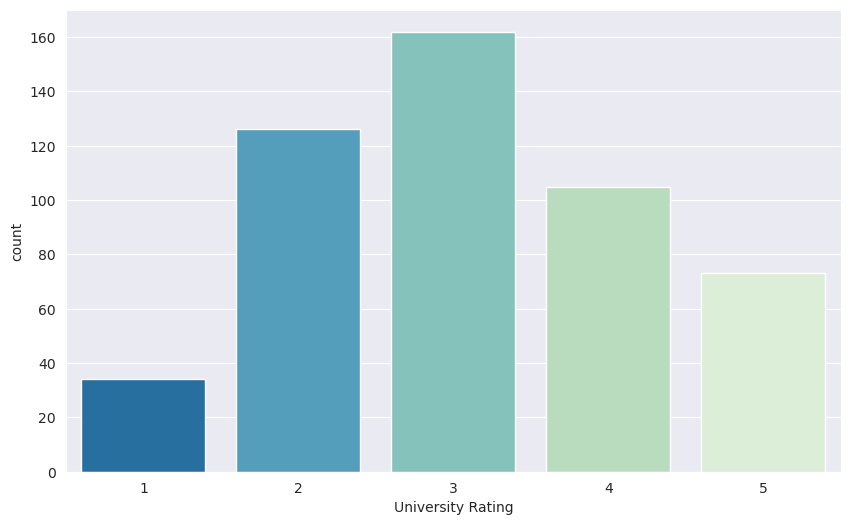

1     34
5     73
4    105
2    126
3    162
Name: University Rating, dtype: int64


In [17]:
sns.set_style('darkgrid')
sns.countplot(data_ver,x='University Rating',palette="GnBu_r")
plt.show()
print(data_ver['University Rating'].value_counts(ascending=True))

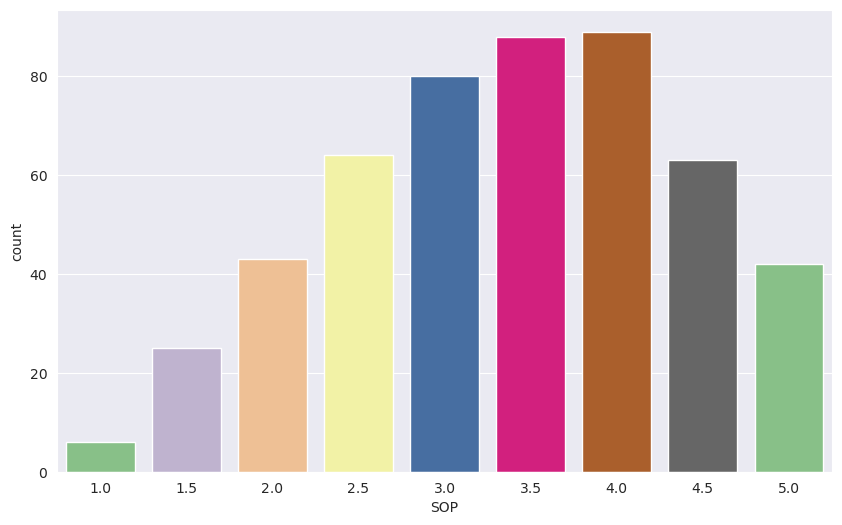

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64


In [18]:
sns.countplot(data=data_ver,x='SOP',palette='Accent')
plt.show()
print(data_ver['SOP'].value_counts())

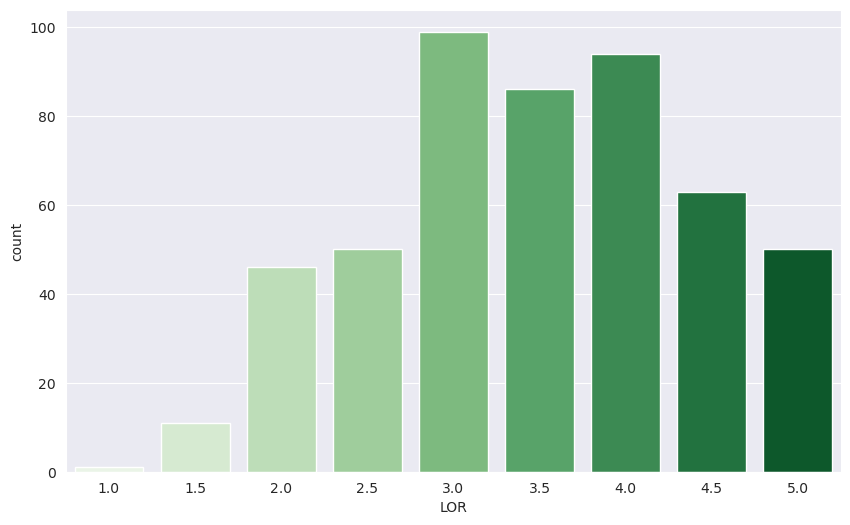

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64


In [19]:
sns.countplot(data=data_ver,x='LOR',palette='Greens')
plt.show()
print(data_ver['LOR'].value_counts())

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



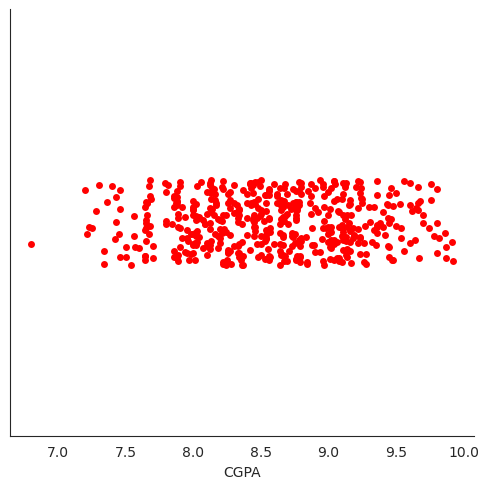

9.65    1
9.31    1
8.23    1
9.42    1
9.78    1
       ..
8.12    7
8.45    7
8.54    7
8.00    9
8.76    9
Name: CGPA, Length: 184, dtype: int64


In [20]:
sns.set_style('white')
sns.catplot(data=data_ver,x='CGPA',color='red')
plt.show()
print(data_ver['CGPA'].value_counts(ascending=True))

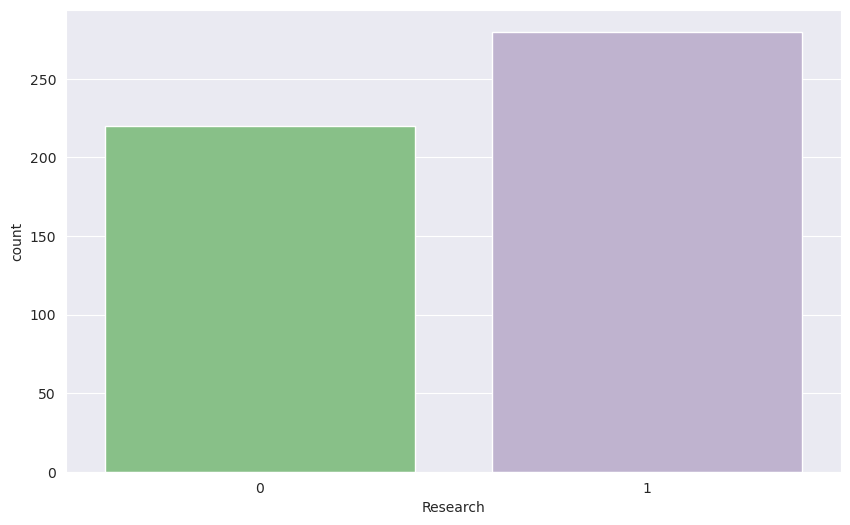

1    280
0    220
Name: Research, dtype: int64


In [21]:
sns.set_style('darkgrid')
sns.countplot(data=data_ver,x='Research',palette='Accent')
plt.show()
print(data_ver['Research'].value_counts())

In [22]:
px.histogram(data_ver,x="Chance of Admit")

In [23]:
print(data_ver['Chance of Admit'].value_counts())

0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: Chance of Admit, Length: 61, dtype: int64


From the data card we can see that the chances of admitting ranges between maximum of 97% and minimum of 37%.

  But as we want to know that admission will happen or not so lets convert our target column into 0 to 1 or we can say into binary output. So, lets convert below 40% of admission of chance consider as 0 class and above that 1 class mean you get the admission.

In [24]:
data_ver['Chances_of_Admitting']=[0 if x<=0.50 else 1 for x in data_ver
                            ['Chance of Admit']]

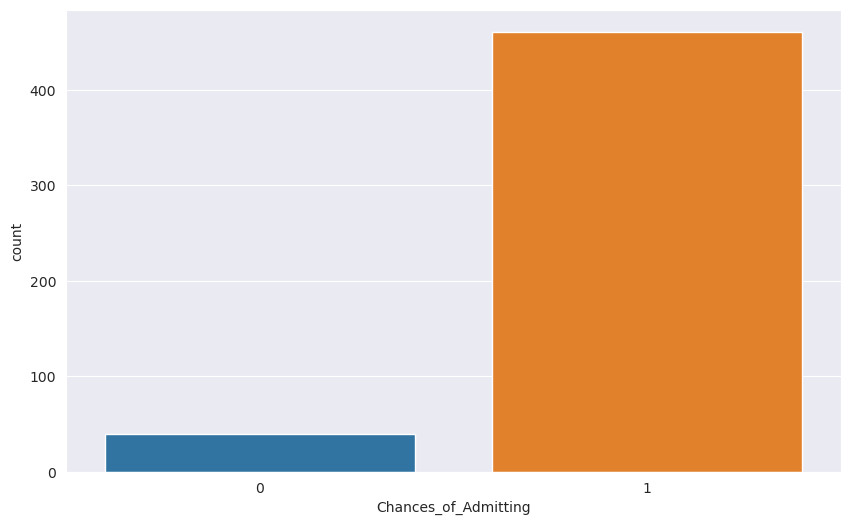

1    461
0     39
Name: Chances_of_Admitting, dtype: int64


In [25]:
sns.countplot(data=data_ver,x='Chances_of_Admitting')
plt.show()
print(data_ver['Chances_of_Admitting'].value_counts())

In [26]:
#dropping old column
data_ver.drop(columns='Chance of Admit',axis=1,inplace=True)

In [27]:
data_ver.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chances_of_Admitting
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


In [28]:
px.histogram(data_ver,x='GRE Score',y='Chances_of_Admitting',marginal="box")

In [29]:
px.scatter(data_ver,x='TOEFL Score',y='Chances_of_Admitting')

In [30]:
px.bar(data_ver,x='University Rating',y='Chances_of_Admitting')

In [31]:
px.bar(data_ver,x='SOP',y='Chances_of_Admitting')

In [32]:
px.bar(data_ver,x='LOR',y='Chances_of_Admitting')

In [33]:
px.bar(data_ver,x='Research',y='Chances_of_Admitting')

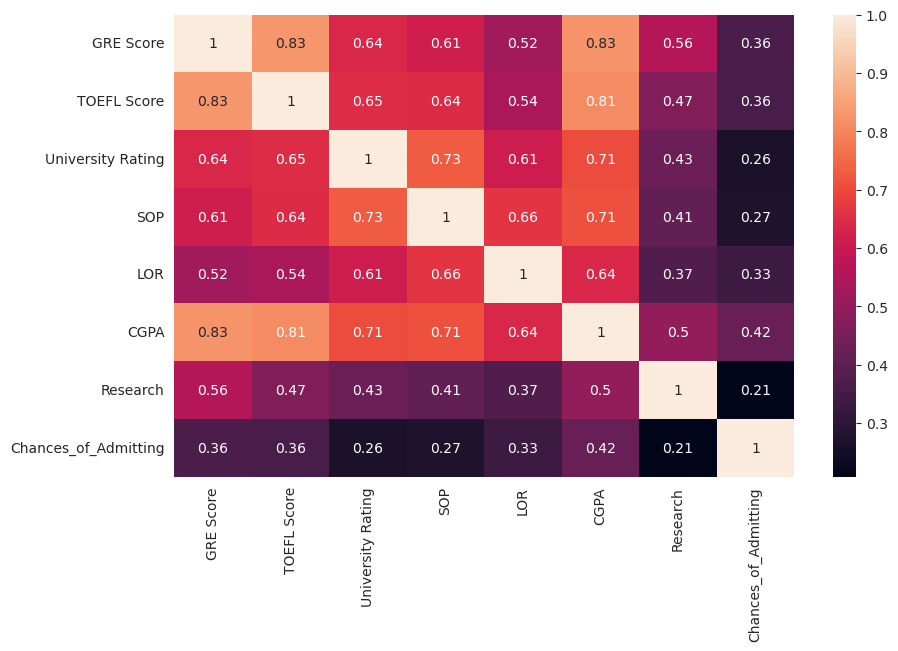

In [34]:
sns.heatmap(data_ver.corr(),annot=True,annot_kws={'size':10})
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



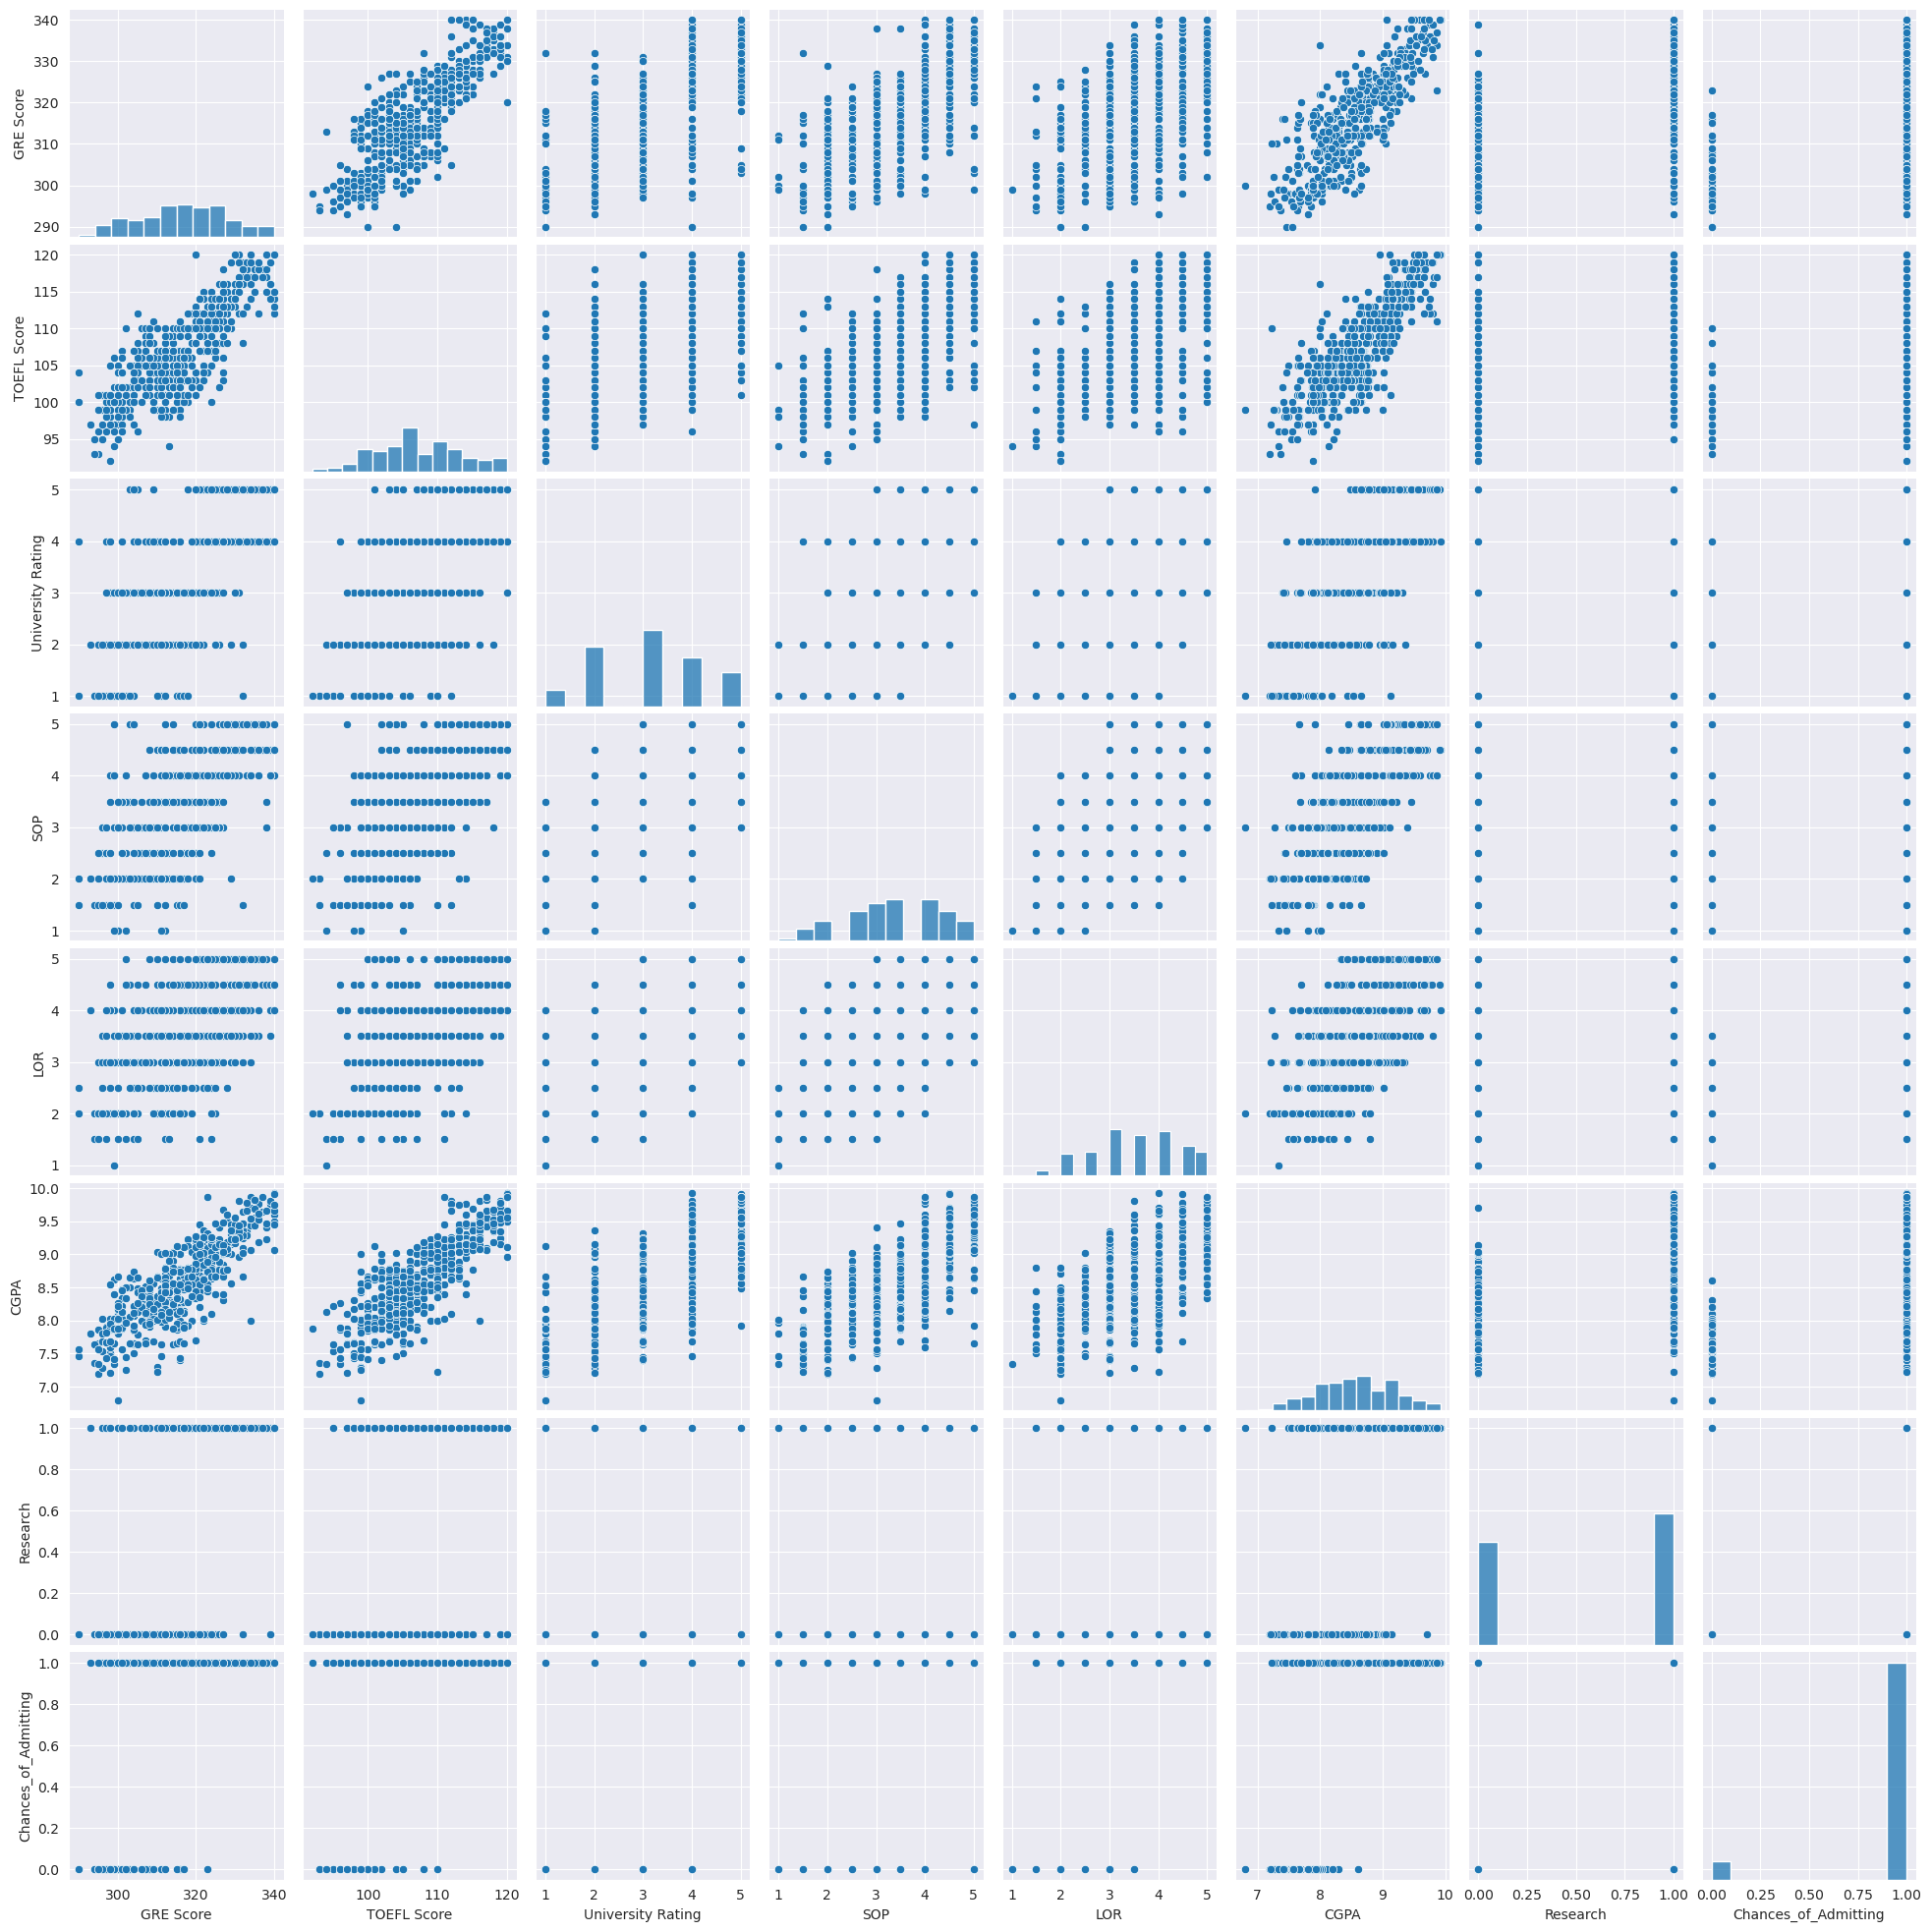

In [35]:
sns.pairplot(data_ver)
plt.show()

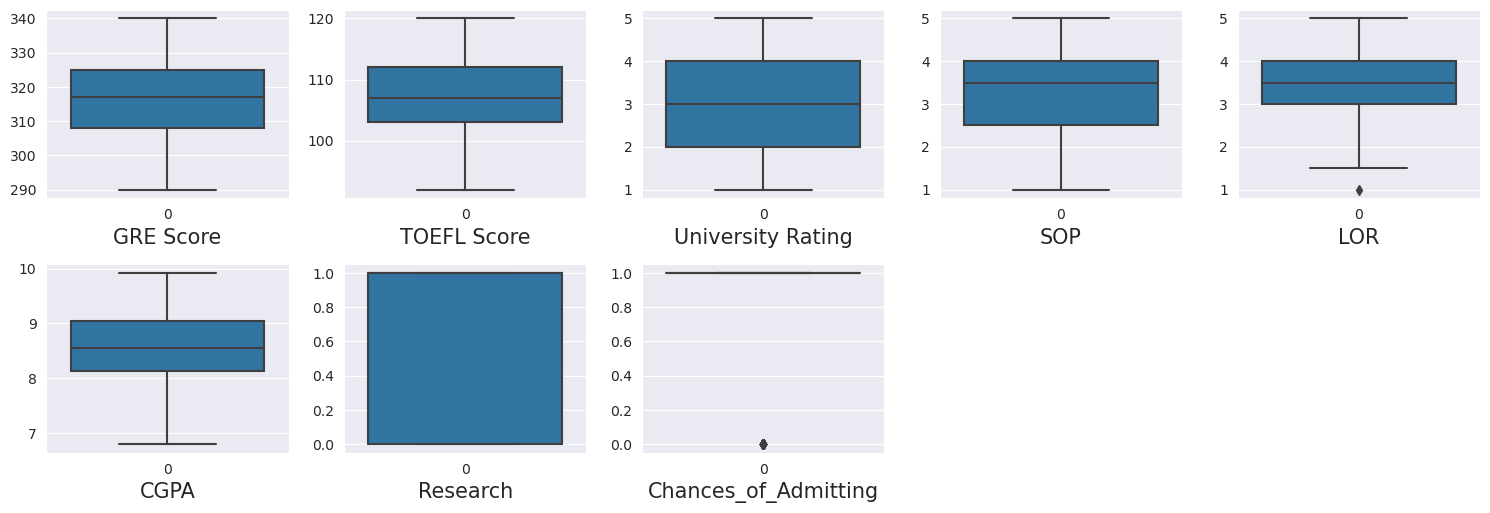

In [36]:
#checking outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data_ver:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.boxplot(data_ver[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

This graph shows that there are some outliers in LOR

In [37]:
#separating the outliers columns
df=['LOR']

In [38]:
z_score=zscore(data_ver[df])
abs_score=np.abs(z_score)
filter_entry=(abs_score<3).all(axis=1)
data=data_ver[filter_entry]
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chances_of_Admitting
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


In [39]:
data.shape

(500, 8)

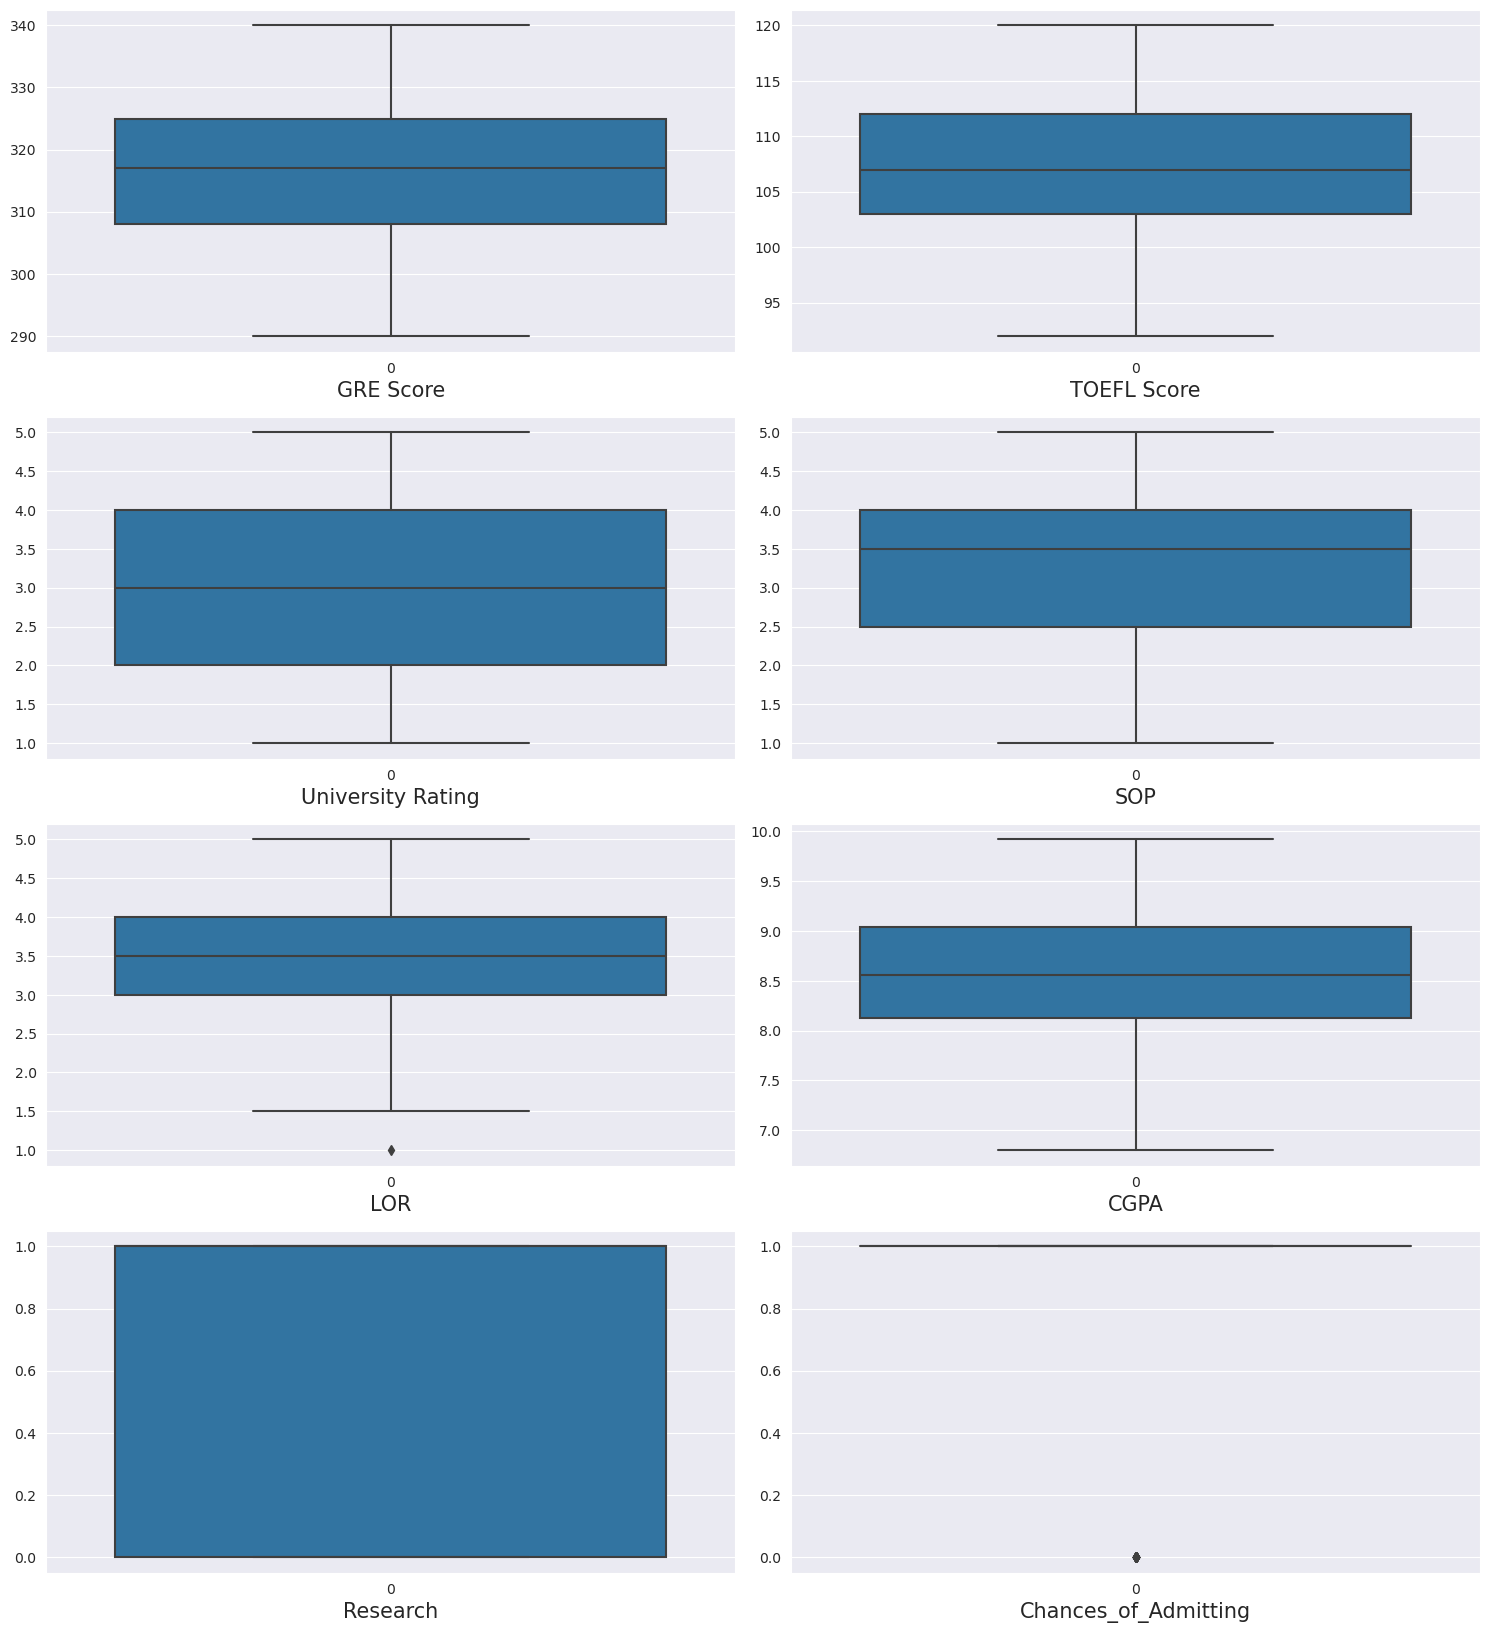

In [40]:
#plotting after removing outliers
figure=plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Now all the outliers were eliminated successfully.

In [41]:
#separating the data & visualizing the relation between features and labels
x=data.drop(columns=['Chances_of_Admitting'])
y=data['Chances_of_Admitting']

In [42]:
#standardizing the data
ss=StandardScaler()
x_scale=ss.fit_transform(x)

In [43]:
#checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scale,i) for i in range (x_scale.shape[1])]
vif["features"]=x.columns
print(vif)

        vif           features
0  4.464249          GRE Score
1  3.904213        TOEFL Score
2  2.621036  University Rating
3  2.835210                SOP
4  2.033555                LOR
5  4.777992               CGPA
6  1.494008           Research


no collinearity in the variables

In [44]:
print(x.shape)
print(y.shape)

(500, 7)
(500,)


# splitting the data into training & testing categories

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.30,
                                               random_state=42)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 7)
(150, 7)
(350,)
(150,)


In [47]:
#Resampling techniques for handling imbalanced data
from imblearn.over_sampling import SMOTE
from collections import Counter
ove_samp=SMOTE()
x_train_ns,y_train_ns=ove_samp.fit_resample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({1: 325, 0: 25})
Counter({1: 325, 0: 325})


# Building the model using Random Forest Classifier

In [48]:
from sklearn.model_selection import cross_val_score
rand=RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators=10)

In [49]:
rand.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [50]:
y_pred=rand.predict(x_train)
acc_1=accuracy_score(y_train,y_pred)
print("Train Report:",acc_1)

Train Report: 0.9971428571428571


In [51]:
pred=rand.predict(x_test)
acc_2=accuracy_score(y_test,pred)
print("Test Report:",acc_2)
cl=classification_report(y_test,pred)
print("classification report",cl)
co=confusion_matrix(y_test,pred)
print("confusion matrix",co)

Test Report: 0.94
classification report               precision    recall  f1-score   support

           0       0.78      0.50      0.61        14
           1       0.95      0.99      0.97       136

    accuracy                           0.94       150
   macro avg       0.86      0.74      0.79       150
weighted avg       0.93      0.94      0.93       150

confusion matrix [[  7   7]
 [  2 134]]


In [52]:
#Accuracy of the model
accu=cross_val_score(rand,x,y,cv=2)
print("Accuracy: {:.2f} %".format(accu.mean()*100))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Accuracy: 91.40 %


In [53]:
#Standard deviation of the model
print("Standard Deviation: {:.2f} %".format(accu.std()))

Standard Deviation: 0.00 %


# Conclusion 
> We got an Accuracy of `91.40%` which results that our model has been trained efficiently.

**Saving the model**

In [54]:
import pickle
file='admission.pickle'
model=pickle.dump(xgb,open(file,'wb'))

NameError: name 'xgb' is not defined